### Problem Statement- To develop a predictive model that can identify customers at risk of churning, enabling the company to take proactive measures to retain them.


## Understanding Business Problem
Here we have to analyze the factors that are causing the customer to churn and also later on we need to generate a prediction system to predict the customer will churn or not

## Understanding the data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
churn=pd.read_csv("Churn.csv")

In [3]:
#displaying the first 5 records
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Columns of Dataset-",churn.columns)

Columns of Dataset- Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
#shape of the dataset
churn.shape

(7043, 21)

In [6]:
#check null values
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#printing the unique values of each columns
print(churn.gender.unique())
print(churn.SeniorCitizen.unique())
print(churn.Partner.unique())
print(churn.Dependents.unique())
print(churn.tenure.unique())
print(churn.PhoneService.unique())
print(churn.MultipleLines.unique())
print(churn.InternetService.unique())
print(churn.OnlineSecurity.unique())
print(churn.OnlineBackup.unique())
print(churn.DeviceProtection.unique())
print(churn.TechSupport.unique())
print(churn.StreamingTV.unique())
print(churn.StreamingMovies.unique())
print(churn.Contract.unique())
print(churn.PaperlessBilling.unique())
print(churn.PaymentMethod.unique())
print(churn.MonthlyCharges.unique())
print(churn.TotalCharges.unique())
print(churn.Churn.unique())


['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


Here we observe that total 6  columns who have boolean values

In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Insights of Data
1.There are 7043 entries of customer
2.There are 21 columns of which
a.18 are categorical or text data
b.3 are numerical data


In [9]:
#statistical description
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#printing the unique values of each columns
a=print(churn.gender.value_counts())
b=print(churn.SeniorCitizen.value_counts())
c=print(churn.Partner.value_counts())
d=print(churn.Dependents.value_counts())
e=print(churn.tenure.value_counts())
f=print(churn.PhoneService.value_counts())
g=print(churn.MultipleLines.value_counts())
h=print(churn.InternetService.value_counts())
i=print(churn.OnlineSecurity.value_counts())
j=print(churn.OnlineBackup.value_counts())
k=print(churn.DeviceProtection.value_counts())
l=print(churn.TechSupport.value_counts())
m=print(churn.StreamingTV.value_counts())
n=print(churn.StreamingMovies.value_counts())
o=print(churn.Contract.value_counts())
p=print(churn.PaperlessBilling.value_counts())
q=print(churn.PaymentMethod.value_counts())
r=print(churn.MonthlyCharges.value_counts())
s=print(churn.TotalCharges.value_counts())
print(churn.Churn.value_counts())


Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

# Data Preprocessing
Here we are taking churn as a target variable and try to derive patterns of churn 
Here there is no missing data hence the only challenge here is to convert categorical into numerical 

In [11]:
#converting categorical into numerical
churn.Partner.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)
churn.Dependents.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)
churn.PhoneService.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)
churn.PaperlessBilling.replace(to_replace=['No','Yes'],value=[0,1],inplace=True)
churn.Churn.replace(to_replace=['No','Yes'], value=[0,1],inplace=True)                                       

In [12]:
churn.OnlineBackup.replace(to_replace=['No','Yes','No internet service'],value=[0,1,2],inplace=True)
churn.OnlineSecurity.replace(to_replace=['No','Yes','No internet service'],value=[0,1,2],inplace=True)
churn.DeviceProtection.replace(to_replace=['No','Yes','No internet service'],value=[0,1,2],inplace=True)
churn.TechSupport.replace(to_replace=['No','Yes','No internet service'],value=[0,1,2],inplace=True)


In [13]:
churn.InternetService.replace(to_replace=['DSL','Fiber optic','No'],value=[0,1,2],inplace=True)
churn.Contract.replace(to_replace=['Month-to-month','One year','Two year'],value=[0,1,2],inplace=True)


In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [15]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,0,0,...,0,0,No,No,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,0,1,...,1,0,No,No,1,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,0,1,...,0,0,No,No,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,0,1,...,1,1,No,No,1,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,1,0,...,0,0,No,No,0,1,Electronic check,70.70,151.65,1


## Exploratory Data Analysis
Here we will be analysing the factors responsible for churning out of a person
Analysis will be 
1.Univariant 
2.Bivariant

In [16]:
#grouping by churn column
Churn=churn.groupby('Churn')
Churn.describe()

SeniorCitizen                                              Partner  \
              count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                      
0            5174.0  0.128721  0.334923  0.0  0.0  0.0  0.0  1.0  5174.0   
1            1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0  1869.0   

                 ... PaperlessBilling      MonthlyCharges             \
           mean  ...              75%  max          count       mean   
Churn            ...                                                   
0      0.528218  ...              1.0  1.0         5174.0  61.265124   
1      0.357945  ...              1.0  1.0         1869.0  74.441332   

                                                      
             std    min    25%     50%   75%     max  
Churn                                                 
0      31.092648  18.25  25.10  64.425  88.4  118.75  
1      24.666053  18.85  56.15  79.650  94.2  118.35  

[2 rows x 104 columns]

In [17]:
#aggregate function to get stacked bar chart
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

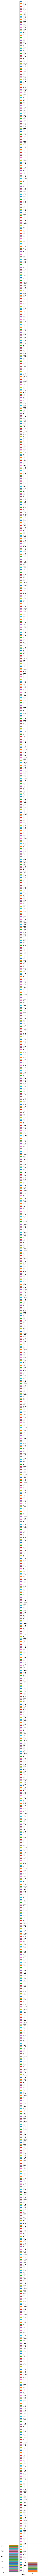

In [18]:
#stacked bar chart
aggregate('Churn','MonthlyCharges',churn).plot(kind='bar',stacked=True);


<AxesSubplot:xlabel='Churn'>

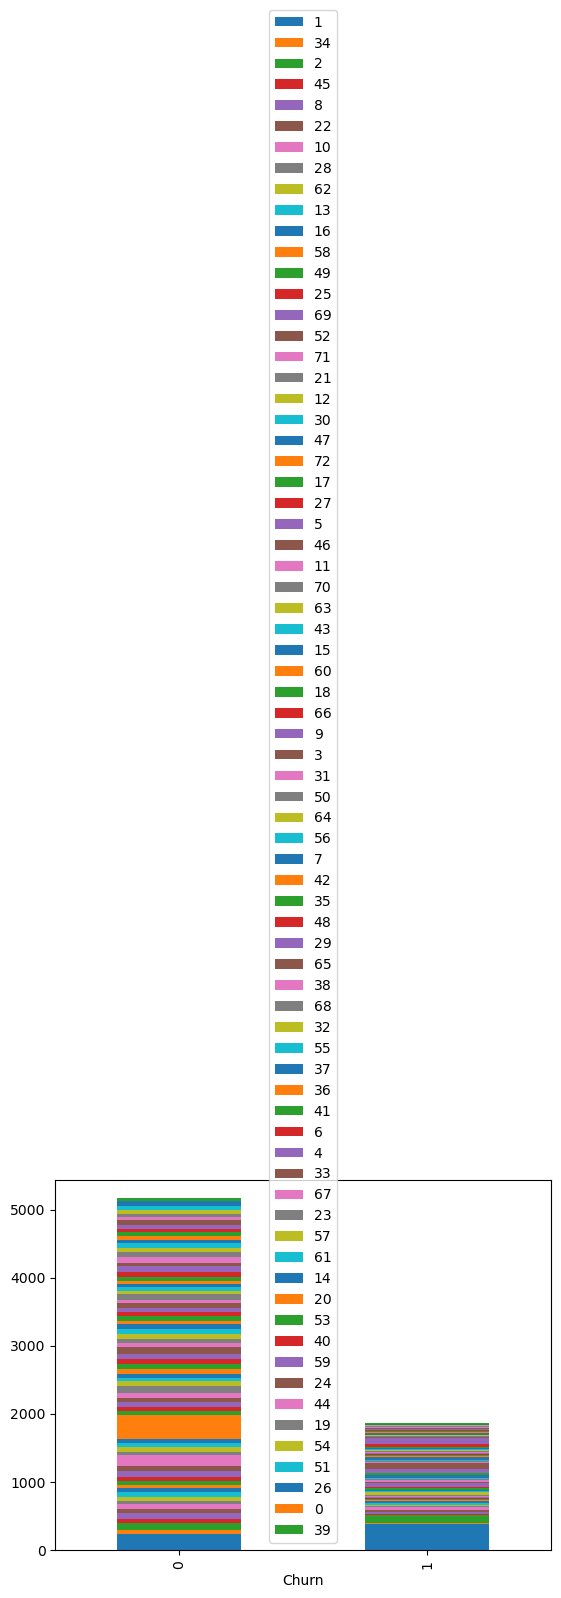

In [19]:
aggregate('Churn','tenure',churn).plot(kind='bar',stacked=True)

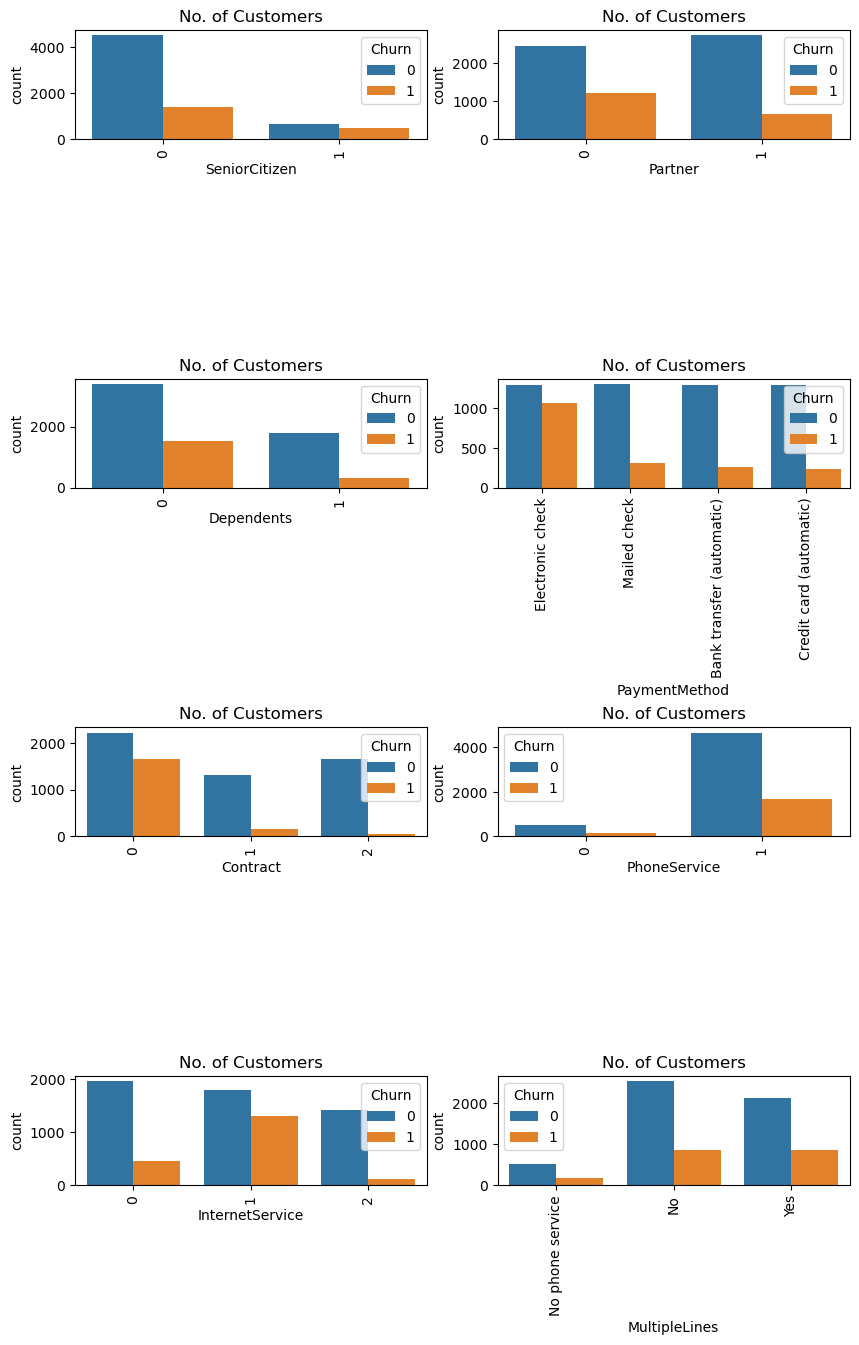

In [20]:
#plotting countplots
features=['SeniorCitizen','Partner','Dependents','PaymentMethod','Contract','PhoneService','InternetService','MultipleLines']
fig=plt.subplots(figsize=(10,15))
for i, f in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.2)
    sns.countplot(x=f,data=churn,hue='Churn')
    plt.xticks(rotation=90)
    plt.title("No. of Customers")

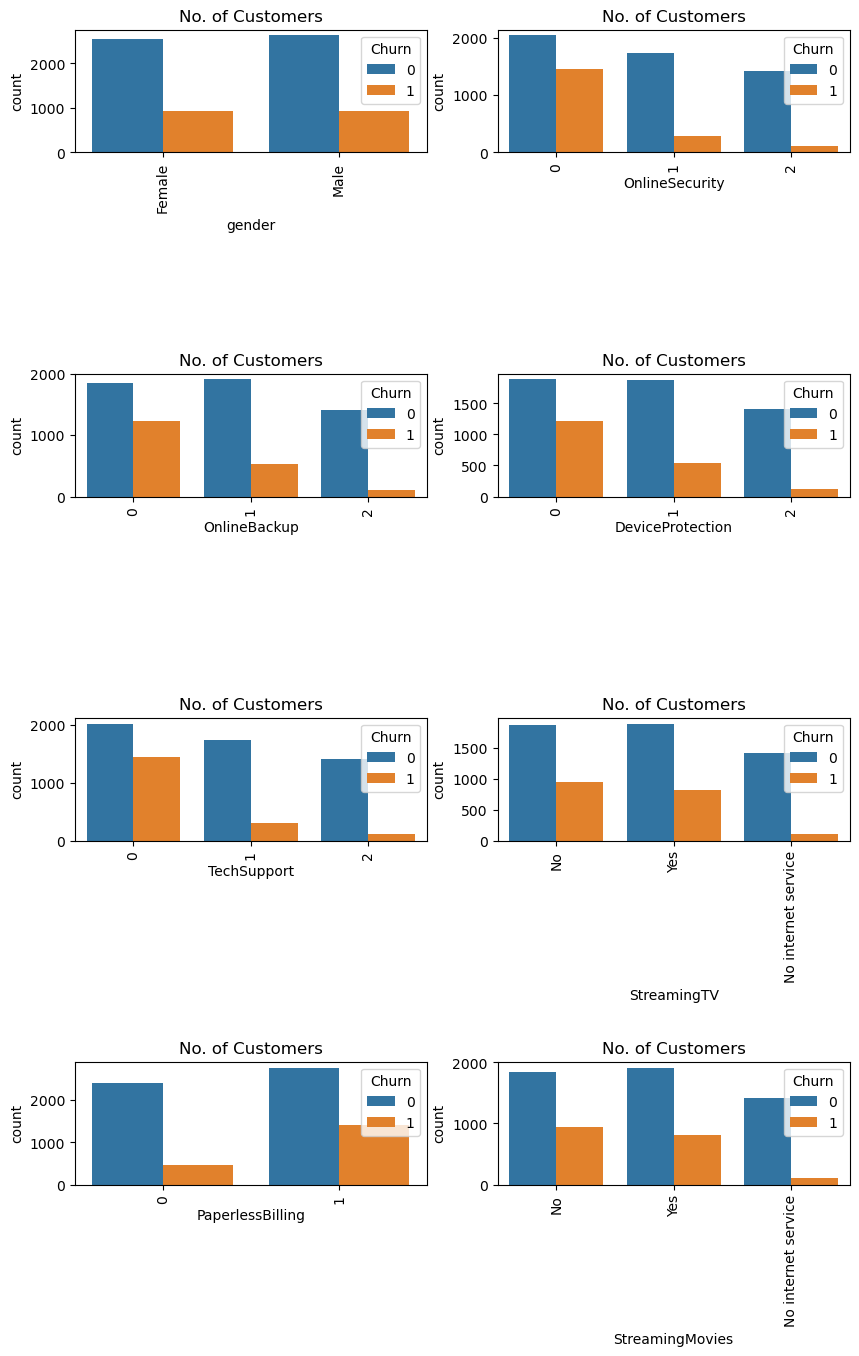

In [21]:
features=['gender','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','PaperlessBilling','StreamingMovies']
fig=plt.subplots(figsize=(10,15))
for i, f in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.8)
    sns.countplot(x=f,data =churn,hue='Churn')
    plt.xticks(rotation=90)
    plt.title("No. of Customers")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

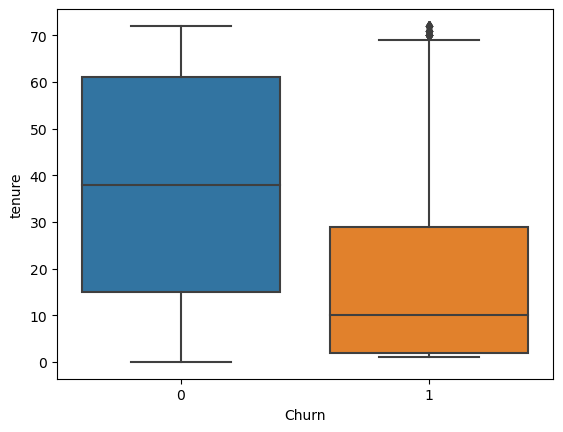

In [22]:
#plotting box plot 
x1=churn['Churn']
y1=churn['tenure']
sns.boxplot(x1,y1)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

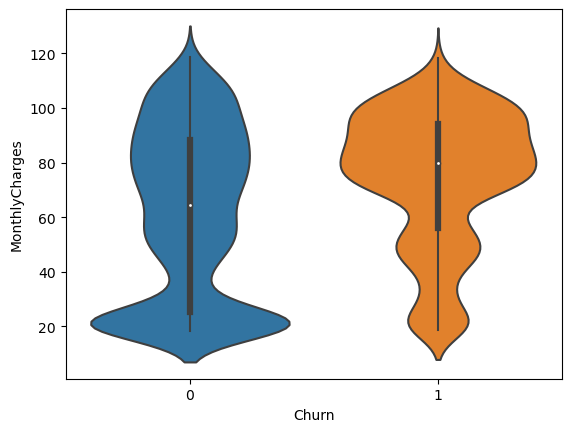

In [23]:
z=churn['MonthlyCharges']
sns.violinplot(x1,z)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

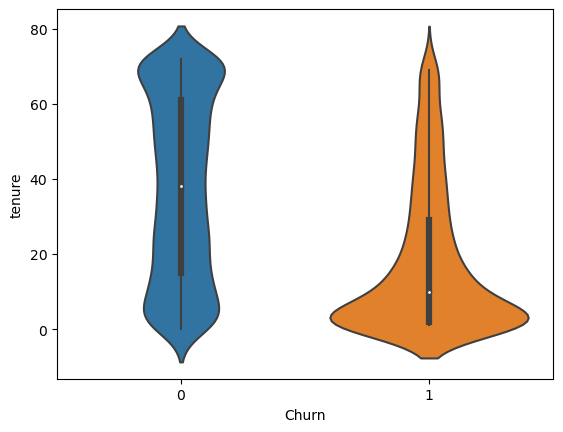

In [24]:
#voilin plot to display the distribution
sns.violinplot(x1,y1)

Text(0.5, 1.0, 'Customers who have churned vs Customers who havent')

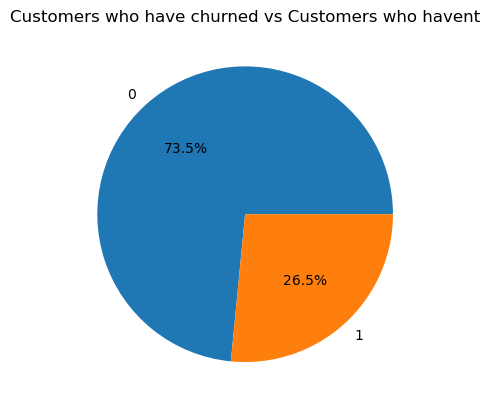

In [25]:
# piechart to dispay the customers who churned
churn1=churn['Churn'].value_counts()
plt.pie(churn1,autopct="%1.1f%%",labels=churn1.index)
plt.title("Customers who have churned vs Customers who havent")

# Meaningful Insides

26.5% customers churn out
Customers who have monthlycharges over 75 are more likely to churn out
Customers who have tenure less than 12 months are more likely to churn out
Customers who dont have partners niether dependants are more likely to churn out
Customers who senior citizens are more likely to churn out
Customers who have monthly billing plans are more likey to churn out
Customers who have paperless bill are more likely to churn out
Customers with no techsupport,no device protection,no online backup,no online security are most likely to churn out
Customers who have fibreoptic internet service are most likely to churn out
Customers who have electronic check as payment mode are most likely to churn out
Gender doesnt have any significant impact on churning


# Machine Learning Model
The target variable is Churn

In [26]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn .metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [27]:
#deriving x 
x=churn[['MonthlyCharges','PaperlessBilling','Contract','InternetService','PhoneService','tenure','Dependents','OnlineBackup','OnlineSecurity','TechSupport']]
#initiating the min max scalling object
x
y=churn['Churn']

<AxesSubplot:>

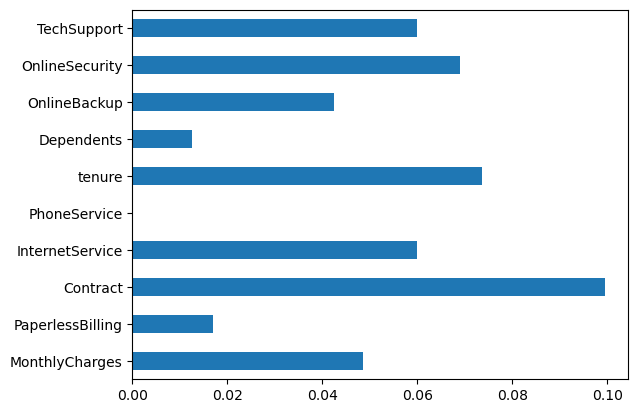

In [28]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importance=mutual_info_classif(x,y)
feat_importances=pd.Series(importance,x.columns[0:len(x.columns)])
feat_importances.plot(kind='barh')

In [29]:
#lets pick top 6 best columns
X=x.drop(['PaperlessBilling','PhoneService','Dependents'],axis=1)

In [30]:
#spliting into train and test
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,y,test_size=0.3)

In [31]:
#builting the model
logmodel=LogisticRegression()

In [32]:
#fitting the data
logmodel.fit(X_Train,Y_Train)

LogisticRegression()

In [33]:
#predicting the outcome 
y_pred_logic=logmodel.predict(X_Test)

In [34]:
#displaying predictions
y_pred_logic


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluation of model


In [35]:
import statsmodels.api as smi

In [36]:
#displaying ols regression results
x2=smi.add_constant(X)
stats_model_regression=smi.OLS(y,x2).fit()

In [37]:
print(stats_model_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     347.9
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:03:50   Log-Likelihood:                -3189.0
No. Observations:                7043   AIC:                             6394.
Df Residuals:                    7035   BIC:                             6449.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4083      0.018     

In [38]:
#confusion matrix
print(confusion_matrix(Y_Test,y_pred_logic))

[[1418  142]
 [ 292  261]]


In [39]:
#importing evaluation test
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score


In [40]:
#displaying evaluation 
print('Log loss = {}'.format(log_loss(Y_Test, y_pred_logic))) 
print('AUC = {}'.format(roc_auc_score(Y_Test, y_pred_logic))) 
print('Accuracy={}'.format(accuracy_score(Y_Test,y_pred_logic)))

Log loss = 7.094151679236312
AUC = 0.6904727129410673
Accuracy=0.7946048272598202


In [41]:
#classification report
print(classification_report(Y_Test,y_pred_logic))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.65      0.47      0.55       553

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



# Random Forest

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [43]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_Train, Y_Train)



RandomForestClassifier(random_state=42)

In [44]:
y_pred_rnd = rf_classifier.predict(X_Test)

In [45]:
accuracy = accuracy_score(Y_Test, y_pred_rnd)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(Y_Test, y_pred_rnd))

print("\nClassification Report:")
print(classification_report(Y_Test, y_pred_rnd))

Accuracy: 0.7785139611926172

Confusion Matrix:
[[1384  176]
 [ 292  261]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1560
           1       0.60      0.47      0.53       553

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [47]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_Train, Y_Train)


y_pred_gradient = gb_classifier.predict(X_Test)

In [48]:

accuracy = accuracy_score(Y_Test, y_pred_gradient)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(Y_Test, y_pred_gradient))

print("\nClassification Report:")
print(classification_report(Y_Test, y_pred_gradient))

Accuracy: 0.79649787032655

Confusion Matrix:
[[1425  135]
 [ 295  258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.66      0.47      0.55       553

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



# Find the best Model

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score



Model: Logistic Regression
Accuracy: 0.7946

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.65      0.47      0.55       553

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113


Confusion Matrix:
[[1418  142]
 [ 292  261]]

Model: Random Forest
Accuracy: 0.7785

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1560
           1       0.60      0.47      0.53       553

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113


Confusion Matrix:
[[1384  176]
 [ 292  261]]

Model: Gradient Boosting
Accuracy: 0.7965

Classification Report:
              precision    recall  f1-score   support



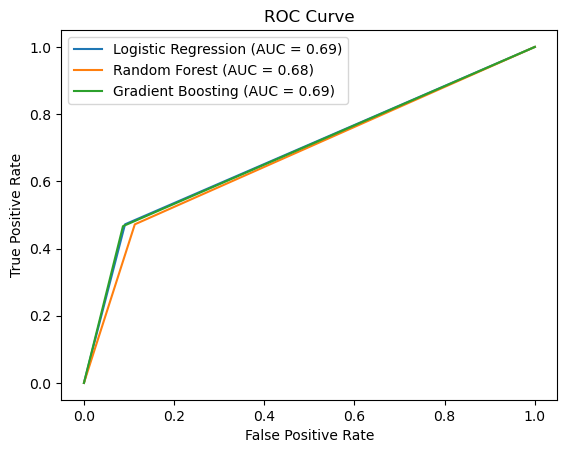

In [50]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
y_preds = [y_pred_logic, y_pred_rnd, y_pred_gradient]  
for model, y_pred in zip(models, y_preds):
    accuracy = accuracy_score(Y_Test, y_pred)
    print(f"\nModel: {model}")
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(Y_Test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(Y_Test, y_pred))

    fpr, tpr, _ = roc_curve(Y_Test, y_pred)
    auc = roc_auc_score(Y_Test, y_pred)

    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
